In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

from sklearn.preprocessing import OneHotEncoder

STYLE = "#ffffff"

%load_ext autoreload
%autoreload 2

from deepSculpt.sculptor import Sculptor
from deepSculpt.plotter import Plotter
from deepSculpt.encoder import Encoder
from deepSculpt.decoder import Decoder
# from deepSculpt.params import *
# from deepSculpt.model import Generative_Model


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
void_dim = 48 # greenyellow, chartreuse, mediumpurple, orange, crimson, turquoise, gold

sculptor = Sculptor(void_dim = void_dim,
                    n_edge_elements = 0,
                    n_plane_elements = 8,
                    n_volume_elements = 15,
                    color_edges = "dimgrey",
                    color_planes = "snow",
                    color_volumes = ["crimson", "turquoise", "gold", "greenyellow","mediumpurple"],
                    element_edge_min= int(void_dim*0.8),
                    element_edge_max = int(void_dim*0.9),
                    element_grid_min = int(void_dim*0.9),
                    element_grid_max = int(void_dim*0.95),
                    element_plane_min = int(void_dim*0.4),
                    element_plane_max = int(void_dim*0.8),
                    element_volume_min = int(void_dim*0.2),
                    element_volume_max = int(void_dim*0.5),
                    step = 1,
                    verbose = False)

sculpture = sculptor.generative_sculpt()

# sculptor.plot_sculpture()

Time for sculptures is 0.04034900665283203 sec


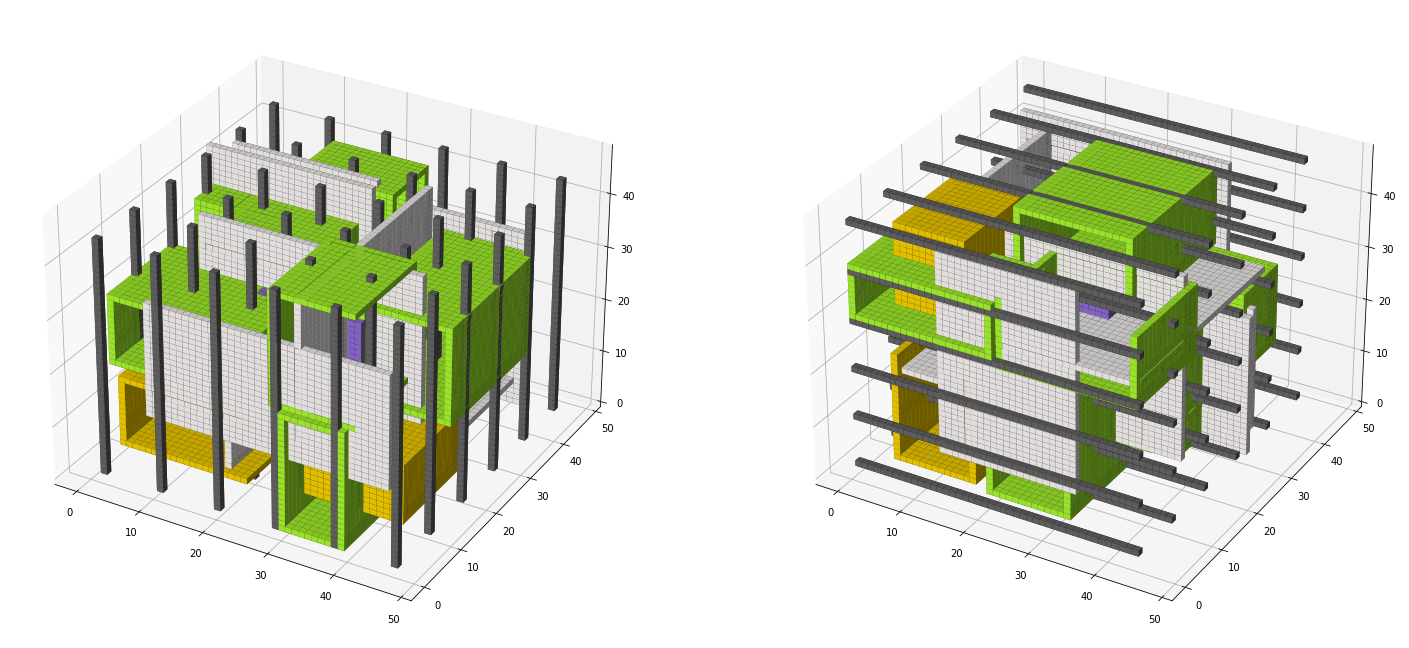

In [8]:
plotter = Plotter(sculpture, "#ffffff")

plotter.plot_sculpture()

In [9]:
from voxelfuse import Mesh

mesh = Mesh.fromVoxelModel(sculpture[0])

mesh.export(filename + '.vox')

ModuleNotFoundError: No module named 'quad_mesh_simplify'

In [10]:
encoder = Encoder(sculpture[1])

encoded_output = encoder.encoder()

/home/garassinoj/.pyenv/versions/3.8.12/envs/deep-sculpt/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'np' is not defined

In [ ]:
decoder = Decoder(encoded_output[0], encoded_output[1], 48)

In [ ]:
sculpture.shape

(144, 48, 48)

In [ ]:
classes = encoded_output[1]

In [ ]:
decoded_output = decoder(sculpture, classes, void_dim) # returns decoded void and decoded color

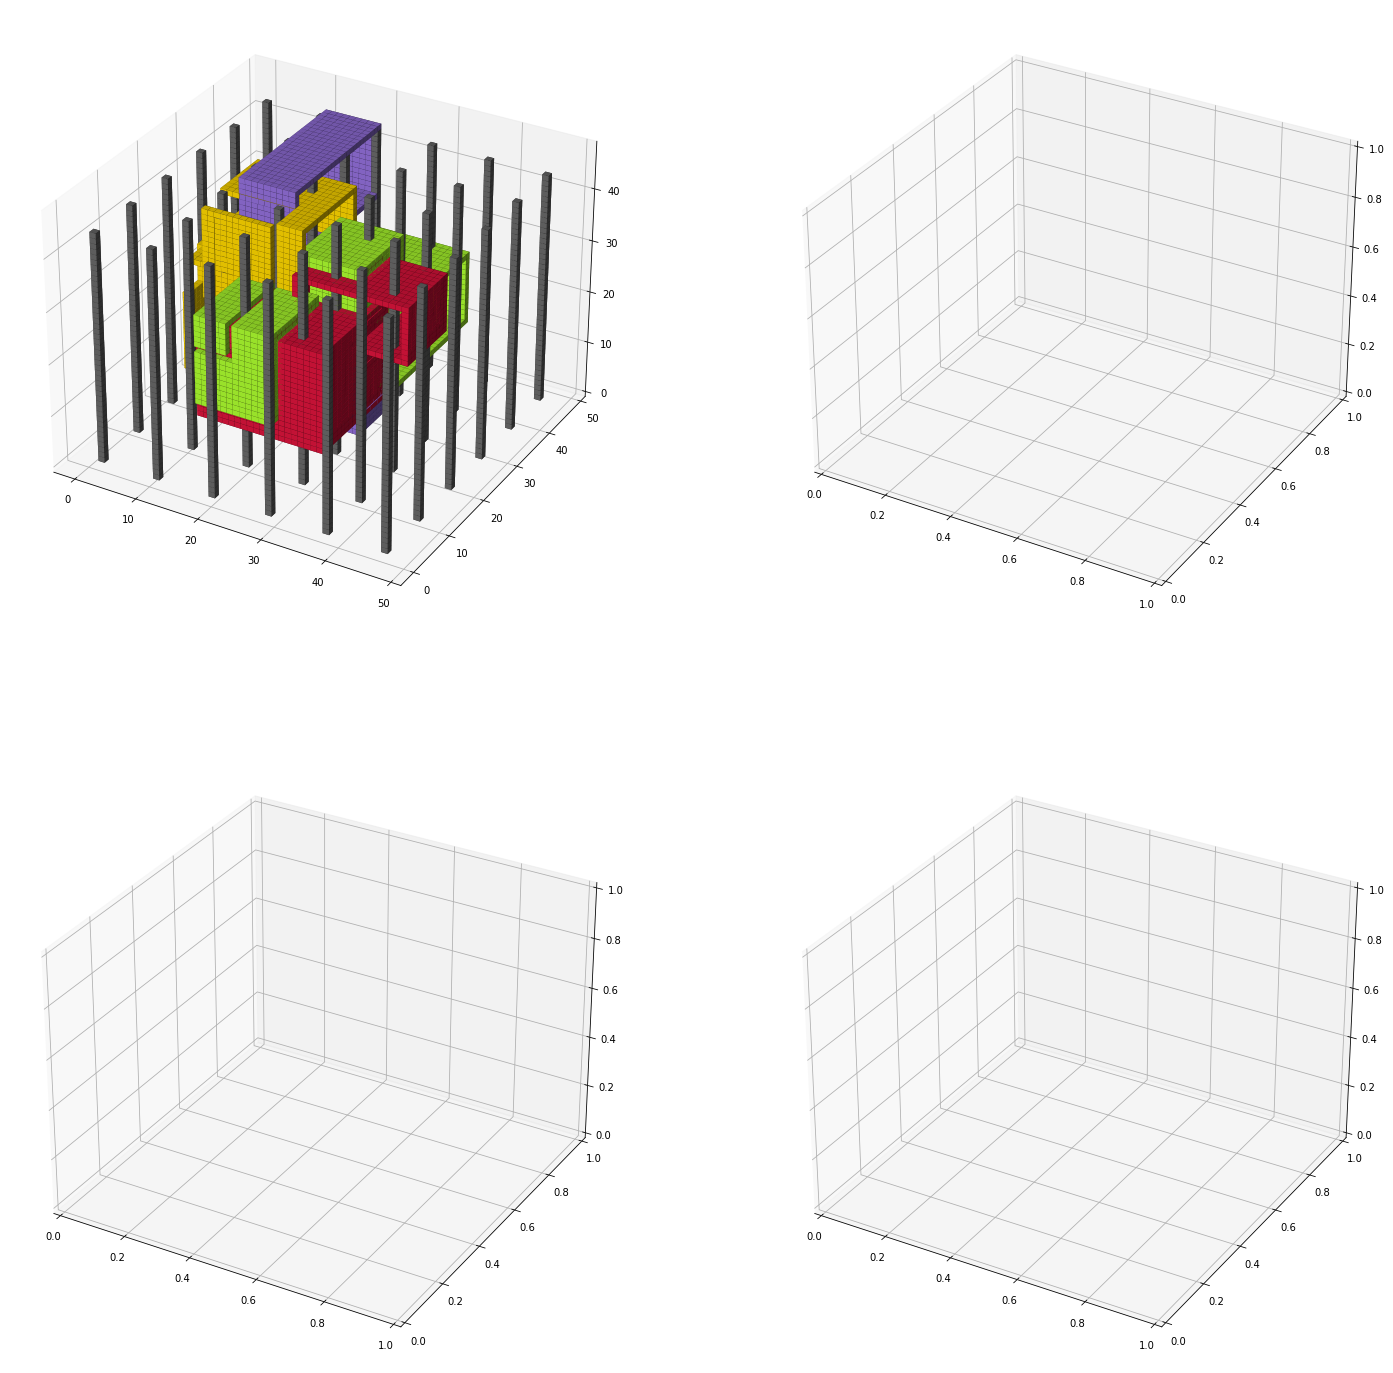

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(25, 25), facecolor = (STYLE), subplot_kw=dict(projection="3d"))
axes = axes.ravel() # flats
for index in range(1):
    axes[index].voxels(decoded_output[0], facecolors=decoded_output[1], edgecolors="k", linewidth=0.05)

In [ ]:
plt.savefig('image.png')

<Figure size 432x288 with 0 Axes>